In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing, cross_validation

# The dude that did this: https://www.youtube.com/watch?v=j6jstahQp2A


url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip"
c=pd.read_csv(url, compression='zip')

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip"
d=pd.read_csv(url, compression='zip')

c = c[['Accident_Index', 'Accident_Severity' ,'Date','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions']]
d = d[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle']]

# c.groupby('Road_Surface_Conditions').count() /////// Important stuff
print(c.shape)
print(d.shape)

l = [c,d]
# joined = pd.concat(l,join_axes=[a.Accident_index]) #Works with axis=1, but has two columns of accident_index
joined = pd.merge(c, d, on='Accident_Index')

joined.shape

df = joined

df.Accident_Severity = df.Accident_Severity.replace(2,1)
df.Accident_Severity = df.Accident_Severity.replace(3,0)

df.dropna()

print(df.shape)
df.head(5)



C:\Users\jalarsen\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(136621, 10)
(252500, 5)
(252500, 14)


,Accident_Index,Accident_Severity,Date,Day_of_Week,Time,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Reference,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,2016010000005,0,01/11/2016,3,02:30,3,30.0,5,1,1,1,1,51,-1
1,2016010000005,0,01/11/2016,3,02:30,3,30.0,5,1,1,2,1,23,4
2,2016010000006,0,01/11/2016,3,00:37,3,30.0,4,1,1,1,2,36,1
3,2016010000008,0,01/11/2016,3,01:25,3,30.0,4,1,1,1,1,24,5
4,2016010000016,0,01/11/2016,3,09:15,3,30.0,1,1,1,1,1,55,7


In [23]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing, cross_validation




#Define input array with angles from 60deg to 300deg converted to radians
df = joined.drop(['Date','Time'], 1) #,'1st_Road_Class','Road_Surface_Conditions','Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle', 'Age_of_Driver'], axis=1)
# print(df)
df = df.dropna()
# df.drop(['Date','Time'], 1)
# print(df)

X = df.drop(['Accident_Severity'], axis=1)
y = df.Accident_Severity
# print(X)

# print(df.shape)
# print(X.shape)


array = df.values
X = array[:20000,2:]
# X = 
y = array[:20000,1]



#------------------------------


clf = KMeans(n_clusters=4)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))


# print(joined)'Speed_limit','Light_Conditions','Weather_Conditions',

0.30975


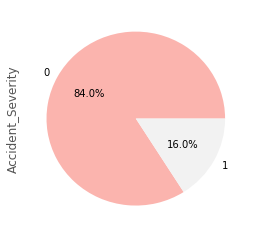

In [22]:
plt.figure(figsize=(4,4))
df['Accident_Severity'].value_counts().plot.pie(autopct= '%1.1f%%', cmap='Pastel1')